## DL II Math Final Project Report

##  Title: Creating 3D images/clips from 2D images

### Group Members:
Dusan Birtasevic  
Kavian Mashayekhi  
Narjes Amusoltani  
Tina Khazaee

--------------------------------------------------

### 1- Abstract

In this project a method for creating 3D images/clips from 2D images was implemented. The idea behind this project comes from [My Heritage Deep Nostalgia](https://www.myheritage.com/deep-nostalgia?ref=louisbouchard.ai) and this project is a mimic of that. Also, the core model was implemented from [First Order Motion Model for Image Animation](https://www.myheritage.com/deep-nostalgia?ref=louisbouchard.ai).

The following gif shows how the First Order Motion Model performs:

<img src="https://github.com/AliaksandrSiarohin/first-order-model/blob/master/sup-mat/vox-teaser.gif" alt="First Order Motion Model">

and this is how our model performed:

<video controls>
  <source src="https://github.com/Kawians/DLIIMathProject/assets/31896340/b3445518-2081-42e0-9828-2e6e3a9a86fb" type="video/mp4">
  Your browser does not support the video tag.
</video>


-------------------------------------------------------

### 2- Introduction

Our project focuses on the fascinating task of transforming 2D images into realistic and dynamic 3D representations. The process of converting flat images into immersive 3D scenes presents a challenging problem due to the absence of depth information in 2D format. To address this issue, we aim to develop an efficient and user-friendly solution that automates the generation of 3D images and clips, making it accessible to a wide range of users.

#### 2-1- Problem Statement

Creating 3D content traditionally involves labor-intensive manual processes and specialized software. This limits its widespread adoption and inhibits its potential impact across various industries. Our project seeks to overcome the barriers associated with 3D content creation by developing an automated approach that requires minimal user intervention, thus democratizing the accessibility of 3D visuals.

#### 2-2- Importance

The ability to produce 3D images and clips from 2D sources holds great significance for industries like entertainment, education, design, and marketing. Enabling a broader audience, including non-experts, to generate 3D content can lead to the proliferation of more engaging and interactive media. Moreover, by reducing the time and skill requirements, our solution can empower creative professionals and businesses to enhance their visual communication and storytelling capabilities.

#### 2-3- Overview of Result

Through our research and development, we have devised an innovative algorithm that utilizes advanced computer vision and deep learning techniques. Our algorithm achieves impressive results by accurately inferring depth information from 2D images and translating it into compelling 3D renditions. The generated 3D images and clips exhibit a convincing level of realism and immersion, mirroring the characteristics of manually crafted 3D content.

-----------------------------------

### 3- Related Works and sources

For this project to be done, we implemented different other project, tried to tailor them and fine tune them to achieve the best possible result.  
At first, the idea behind this project comes from [My Heritage Deep Nostalgia](https://www.myheritage.com/deep-nostalgia?ref=louisbouchard.ai) and this project is a mimic of that.  
  
Secondly, we took advantage of [First Order Motion Model for Image Animation](https://www.myheritage.com/deep-nostalgia?ref=louisbouchard.ai) as our core model for creating 3D images/clips from 2D.  
  
In addition, [Real-ESRGAN: Training Real-World Blind Super-Resolution with Pure Synthetic Data](https://arxiv.org/abs/2107.10833) paper and the [linked notebook]( https://colab.research.google.com/drive/1yNl9ORUxxlL4N0keJa2SEPB61imPQd1B) was used and fine tuned in our work.
  
Also we tried to use [Image Super-Resolution using an Efficient Sub-Pixel CNN](https://keras.io/examples/vision/super_resolution_sub_pixel/) in order to enhance the detail of our input images first and then pass them into the 2D to 3D model.

---------------------------------

### 4- Data

to be filled

#### 4-2- Image Super-Resolution using an Efficient Sub-Pixel CNN Dataset

In order for image enhancement part, BSDS500 (Berkeley Segmentation Dataset 500) was implemented. This dataset is designed for evaluating natural edge detection that includes not only object contours but also object interior boundaries and background boundaries. It includes 500 natural images with carefully annotated boundaries collected from multiple users.  
The structure of this dataset was so unique and we were able to retrieve the required data using [this source](https://keras.io/examples/vision/super_resolution_sub_pixel/).

### 5- Methods

#### 5-1- YOLO

to be filled

#### 5-2- Image Super-Resolution using an Efficient Sub-Pixel CNN

The other step before feeding the image into the model for 3D image generation was to enhance the image details and resolution. The reason of doing this step is that the generator model performance and output quality is directly related and depended to the quality of input image.  
  
So, we decided to do this step after detection with YOLO and before feeding the image to the model in order to achieve a better output from the main model.

### 6- Experiments

#### 6-1- YOLO

to be filled

#### 6-2- Image Super-Resolution using an Efficient Sub-Pixel CNN

As it discussed and explained before, in this step we decided to implement a CNN model to increase the resolution and image quality of our input image before feeding it to the model for 3D generation.  
  
The source of training this model was a notebook for enhancement of picture details that could be found here: [Image Super-Resolution using an Efficient Sub-Pixel CNN](https://keras.io/examples/vision/super_resolution_sub_pixel/).  
  
We implemented this Efficient Sub-Pixel CNN to increase the details of the 2D images input of our 2D to 3D model.  
  
Here is the link to the complete notebook: ***LINK***
  
Below, we will discuss the main part of the implementation.

#### 6-2-1- Data Pre-processing

One of the most important parts of this training was to prepare the dataset in a way that we have low resolution images from one hand and have the original high quality images on the other hand. This could make our model able to be trained and it was also a good metric for us to evaluate the performance of the model.  
  
So, for pre-processing first we changed the color space from RGB to YUV.
  
For the input data (low-resolution images), we crop the image, retrieve the y channel (luninance), and resize it with the area method (use BICUBIC if you use PIL). We only consider the luminance channel in the YUV color space because humans are more sensitive to luminance change.

For the target data (high-resolution images), we just crop the image and retrieve the y channel.

In [ ]:
# Use TF Ops to process:
def process_input(input, input_size, upscale_factor):
    input = tf.image.rgb_to_yuv(input)
    last_dimension_axis = len(input.shape) - 1
    y, u, v = tf.split(input, 3, axis=last_dimension_axis)
    return tf.image.resize(y, [input_size, input_size], method="area")


def process_target(input):
    input = tf.image.rgb_to_yuv(input)
    last_dimension_axis = len(input.shape) - 1
    y, u, v = tf.split(input, 3, axis=last_dimension_axis)
    return y


train_ds = train_ds.map(
    lambda x: (process_input(x, input_size, upscale_factor), process_target(x))
)
train_ds = train_ds.prefetch(buffer_size=32)

valid_ds = valid_ds.map(
    lambda x: (process_input(x, input_size, upscale_factor), process_target(x))
)
valid_ds = valid_ds.prefetch(buffer_size=32)

So, using the above pre-processing resulted in the following low-resolution images comparing the original ones.

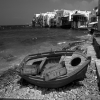

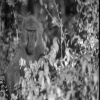

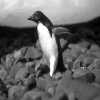

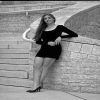

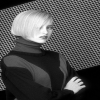

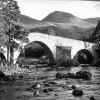

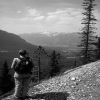

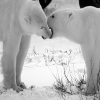

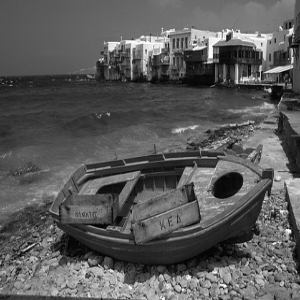

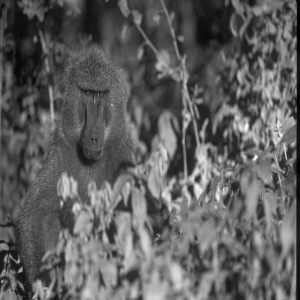

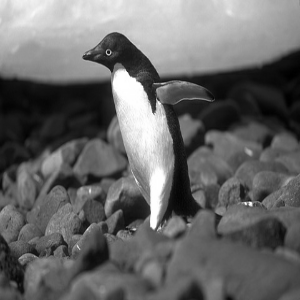

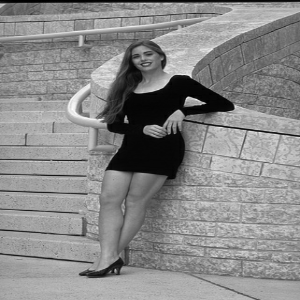

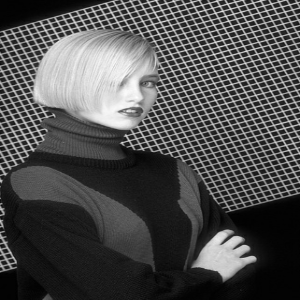

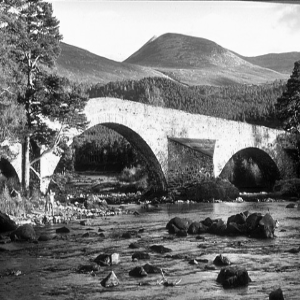

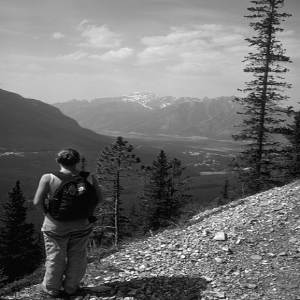

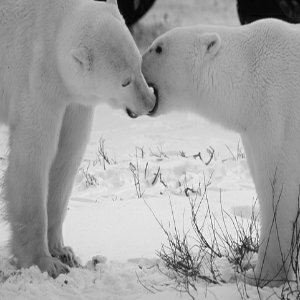

In [ ]:
for batch in train_ds.take(1):
    for img in batch[0]:
        display(array_to_img(img))
    for img in batch[1]:
        display(array_to_img(img))

#### 6-2-2- CNN Model

Then we defined a model as below:

In [ ]:
def get_model(upscale_factor=3, channels=1):
    conv_args = {
        "activation": "relu",
        "kernel_initializer": "Orthogonal",
        "padding": "same",
    }
    inputs = keras.Input(shape=(None, None, channels))
    x = layers.Conv2D(64, 5, **conv_args)(inputs)
    x = layers.Conv2D(64, 3, **conv_args)(x)
    x = layers.Conv2D(32, 3, **conv_args)(x)
    x = layers.Conv2D(channels * (upscale_factor ** 2), 3, **conv_args)(x)
    outputs = tf.nn.depth_to_space(x, upscale_factor)

    return keras.Model(inputs, outputs)

### 7- Conclusion

to be filled